In [1]:
# This line imports pandas, numpy, matplotlib.pyplot, seaborn, and custom function relevant to part 2
from admission_rate import *

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION

## Part 2: Gender bias in admission within each major at UC Berkeley in 1973

In Part 1 of this module, we looked at the admission data of UC Berkeley in 1973 and found that 44% of male applicants were admitted while only 35% of female applicants were admitted. This difference is statistically significant, so it is highly unlikely to result from random chance.

In Part 2, we will now dive more deeply into the same admission data by separating applicants by major. Our goal is to find out where this university-wide gender bias in admission comes from. If we can find out which major is most gender biased in its admission process, we can perhaps give the university a more targeted policy recommendation.

As a reminder to Part 1, this is the plot we produced: 

![admission_per_gender_plot](admission_per_gender_plot.png)

**Question 0)** State the conclusion you reached from Part 1, based on the above plot.

*Your Answer Here*

## **Question 1: Comprehensive Analysis**

**Question 1.1:** Like last lab, load the *```berkeley.csv```* dataset below.

In [ ]:
berkeley = ...
berkeley

In [2]:
# Instructor Solution

berkeley = pd.read_csv('berkeley.csv')
berkeley

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [3]:
# Just run this code block

def accepted_count(x):
    return (x == "Accepted").sum()

def rejected_count(x):
    return (x == "Rejected").sum()

grouped_data = berkeley.groupby(['Major', 'Gender'])

acceptance_counts = grouped_data['Admission'].apply(accepted_count).rename('Accepted')
rejection_counts = grouped_data['Admission'].apply(rejected_count).rename('Rejected')

admissions_by_all = pd.concat([acceptance_counts, rejection_counts], axis=1)
admissions_by_all.reset_index(inplace=True)

admissions_by_all

,Major,Gender,Accepted,Rejected
0,A,F,89,19
1,A,M,825,313
2,B,F,17,8
3,B,M,353,207
4,C,F,201,392
5,C,M,120,205
6,D,F,131,244
7,D,M,138,279
8,E,F,94,299
9,E,M,53,138


**Question 1.2:** Using the `admissions_by_all` dataframe provided above, calculate the total applicants and acceptance rate for each combination of major and gender. For clarity, your DataFrame should have the following columns: Major, Gender, Accepted, Rejected, Counts, and Acceptance Rate.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Your resulting DataFrame should resemble the table below:</i> <br> <br>
![admissions_by_all_output](admissions_by_all_output.png)

</details>

In [ ]:
admissions_by_all['Counts'] = ...
admissions_by_all['Acceptance Rate'] = ...

admissions_by_all

In [4]:
# Instructor Solution

admissions_by_all['Counts'] = admissions_by_all['Accepted'] + admissions_by_all['Rejected']
admissions_by_all['Acceptance Rate'] = admissions_by_all['Accepted'] / admissions_by_all['Counts']

admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,108,0.824074
1,A,M,825,313,1138,0.724956
2,B,F,17,8,25,0.680000
3,B,M,353,207,560,0.630357
4,C,F,201,392,593,0.338954
5,C,M,120,205,325,0.369231
6,D,F,131,244,375,0.349333
7,D,M,138,279,417,0.330935
8,E,F,94,299,393,0.239186
9,E,M,53,138,191,0.277487


**Question 1.3:** Before we can build a `bar` plot that visualizes the acceptance rates by major and gender, we must first calculate the admission errors for each major-gender pair. 

For example, the variance in the acceptance rate for female applicants who applied to major A, assuming applicants are admitted by random without any major or gender consideration, is given by

$$\operatorname{Var}(p_{\mathrm{app},A,F}) = \frac{N_{\mathrm{adm}}}{N_{\mathrm{app}}^2} \frac{1-p_{\mathrm{app},A,F}}{p_{\mathrm{app},A,F}}.$$

Your task is to generalize this formula to any major-gender pair. To ensure you're on the right track, you should get admission errors of 0.0075 for major A, gender F and 0.16 for major B, gender M.

In [ ]:
majors = ... # Get all of the unique majors (there should be 6 + "Other")
admission_error = []

for major in majors:
    major_df = ... # This should be a dataframe including only the current major of the for loop
    app = ... # Given the major, total number of students who applied
    adm = ... # Given the major, total number of students who were accepted/admitted
    p_female_app = ... # Given the major, percentage of students who applied who were female
    p_male_app = ... # Given the major, percentage of students who applied who were male
    var_f = ... # variance in the acceptance rate for females who applied to some major, implementing the formula above
    var_m = ... # variance in the acceptance rate for females who applied to some major, implementing the formula above
    admission_error.append(np.sqrt(var_f))
    admission_error.append(np.sqrt(var_m))

admissions_by_all["Admission Error"] = admission_error
admissions_by_all

In [5]:
# Instructor Solution

majors = admissions_by_all['Major'].unique()
admission_error = []

for major in majors:
    major_df = admissions_by_all[admissions_by_all['Major'] == major]
    app = major_df['Counts'].sum()
    adm = major_df['Accepted'].sum()
    p_female_app = major_df[major_df['Gender'] == 'F'].reset_index()['Counts'][0] / app
    p_male_app = major_df[major_df['Gender'] == 'M'].reset_index()['Counts'][0] / app
    var_f = (1 - p_female_app) / p_female_app * (adm / app**2)
    var_m = (1 - p_male_app) / p_male_app * (adm / app**2)
    admission_error.append(np.sqrt(var_f))
    admission_error.append(np.sqrt(var_m))

admissions_by_all["Admission Error"] = admission_error
admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate,Admission Error
0,A,F,89,19,108,0.824074,0.078762
1,A,M,825,313,1138,0.724956,0.007475
2,B,F,17,8,25,0.680000,0.155621
3,B,M,353,207,560,0.630357,0.006947
4,C,F,201,392,593,0.338954,0.014449
5,C,M,120,205,325,0.369231,0.026363
6,D,F,131,244,375,0.349333,0.021838
7,D,M,138,279,417,0.330935,0.019638
8,E,F,94,299,393,0.239186,0.014473
9,E,M,53,138,191,0.277487,0.029780


**Question 1.4:** Construct a `bar` plot that visualizes the admission rates by gender within each major. We recommend using helper function provided below `hued_barplot_with_error`.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Each x variable should be a different major plotting the acceptance rates for the two genders.</i>
- <i>Use the `hue` parameter as a way to differentiate between the two genders</i>
- <i>`df` should be type `pd.Dataframe`. `x`, `y`, `hue`, and `error` should be type `str`

</details>

In [ ]:
...

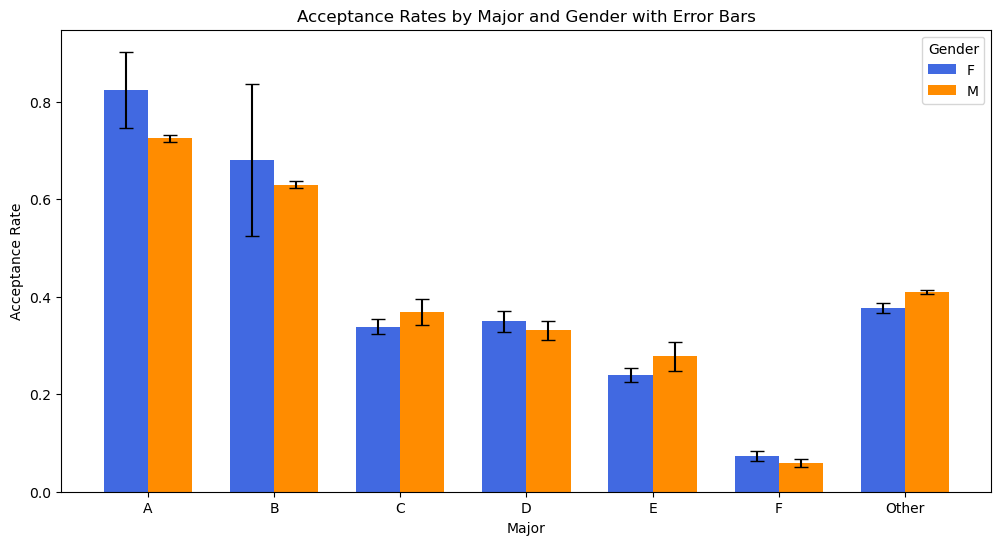

In [6]:
# Instructor Solution

hued_barplot_with_error(admissions_by_all, 'Major', 'Acceptance Rate', 'Gender', 'Admission Error')

**Question 1.5:** In the bar plot above, for each major, do the acceptance rates for male and female applicants differ significantly? That is, do they differ much more than their individual error bars?

**Question 1.6:** How many majors have a gender discrepancy in acceptance rates greater than the error bars? If each error bar represents a 68% confidence interval, how many of the 7 majors do we expect to have a gender discrepancy greater than the error bars just by random chance?

**Question 1.7:** Based on the answers to the previous two questions, is there any statistically significant gender bias in the per-major admission process across the university?

*Your Answer Here*

Remember that in Part 1, we concluded that the university's admission process was significantly gender biased, yet we just now concluded that the per-major admission process did not show any significant gender bias. What's going on here? Let's now plot the data in a different way to figure it out!

**Question 1.8:** Construct a bar plot comparing the total number of applicants between two genders for each major. In each bar, stack the numbers of accepted and rejected applicants. (Just use the helper function below.)

In [ ]:
df_without_other = ...
...

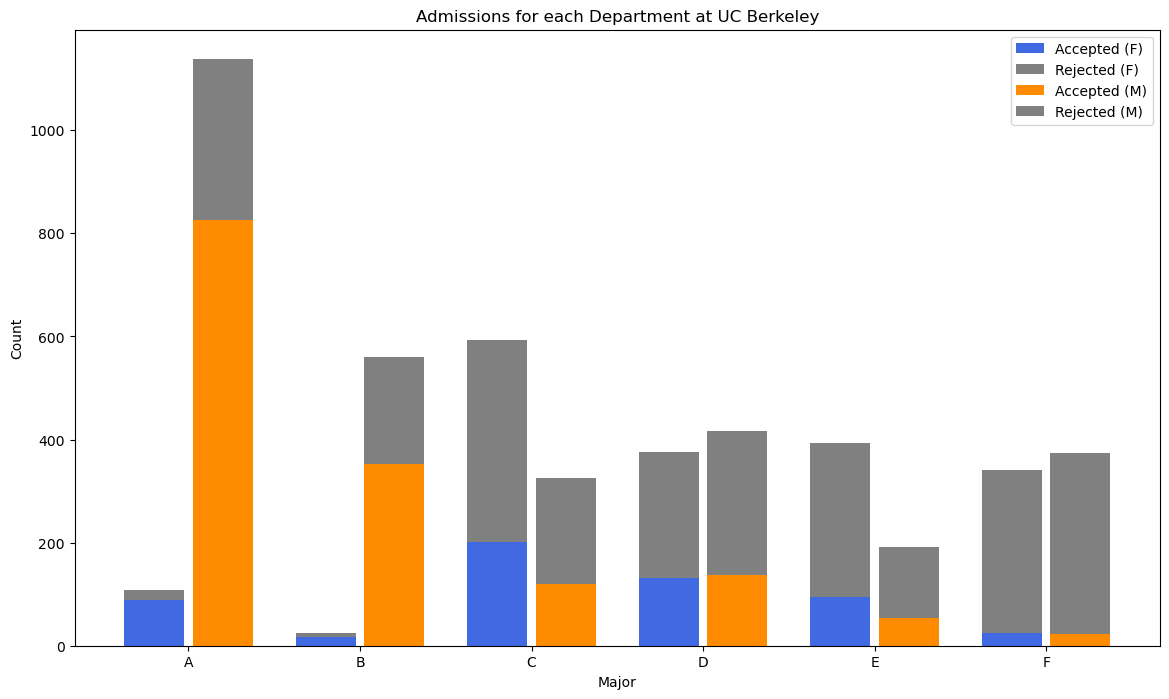

In [7]:
# Instructor Solution
df_without_other = admissions_by_all[admissions_by_all["Major"] != "Other"]
plot_admissions(df_without_other, "Major", "Gender", "Rejected", "Accepted")

**Question 1.9:** Which two majors are most popular amongst male/female applicants? Are some of these majors "easier" to get in than others?

**Question 1.10:** Based on this, what would you say is the primary source of university-wide gender bias in the admission process?

**Question 1.11:** Recall your policy recommendation based on your conclusions in Part 1. Would you now adjust that policy recommendation in light of the new findings?

*Your Answer Here*

## **Question 2: Sandbox**

Now that we have fully explored UC Berkeley's 1973 graduate admission, let us now use what we have learned and apply it to a new dataset.

We will now take a look at Berkeley's incoming freshman demographics from 1981 to 1988. The original data can be found [here](https://academic-senate.berkeley.edu/sites/default/files/karabel_report.pdf) on Table 3.

For your convenience, we have loaded two datasets. 
<br>
`all_ethnic_groups`: A fully expanded dataframe showing the ethnic distributions of all recorded ethnic groups. Each value represents the percent that ethnic group makes up of Berkeley's incoming freshman. Note that the columns do not add to 100 since some ethnic groups are simply the sum of all of its appropriate subgroups.
<br>
`major_ethnic_groups`: A more concise dataframe showing the ethnic distributions of the major ethnic groups. These columns do add to 100.

In [8]:
all_ethnic_groups = pd.read_csv("all_ethnic_groups.csv")
major_ethnic_groups = all_ethnic_groups[['Year', 'American Indian', 'Asian', 'Black', 'Hispanics', 'White', 'Other', 'No Ethnic Data', 'Total']]
display(major_ethnic_groups)
display(all_ethnic_groups)

,Year,American Indian,Asian,Black,Hispanics,White,Other,No Ethnic Data,Total
0,1981,0.3,26.2,5.2,6.4,57.9,2.9,1.1,100.0
1,1982,0.3,27.6,5.6,5.7,57.7,2.2,0.9,100.0
2,1983,0.4,28.0,5.6,6.1,56.7,2.3,0.9,100.0
3,1984,0.6,24.3,7.3,8.8,55.7,1.5,1.7,100.0
4,1985,0.7,26.9,7.8,10.5,48.0,2.0,4.1,100.0
5,1986,0.9,26.7,8.2,12.4,45.6,1.7,4.5,100.0
6,1987,2.1,25.4,12.5,17.0,39.8,0.2,3.0,100.0
7,1988,1.8,26.2,10.8,18.6,37.0,0.8,4.9,100.0


,Year,American Indian,Chinese,East Ind./Pak.,Japanese,Korean,Pacific Islander,Filipinos,Other Asian,Asian,Black,Chicano,Latino,Hispanics,White,Other,No Ethnic Data,Total
0,1981,0.3,14.7,0.6,3.3,3.0,0.1,3.4,1.0,26.2,5.2,4.2,2.1,6.4,57.9,2.9,1.1,100.0
1,1982,0.3,14.0,1.0,4.4,3.3,0.1,3.4,1.3,27.6,5.6,3.5,2.2,5.7,57.7,2.2,0.9,100.0
2,1983,0.4,13.8,0.9,3.9,3.6,0.2,3.9,1.8,28.0,5.6,4.1,2.0,6.1,56.7,2.3,0.9,100.0
3,1984,0.6,10.1,1.5,3.1,3.4,0.0,4.7,1.4,24.3,7.3,5.5,3.3,8.8,55.7,1.5,1.7,100.0
4,1985,0.7,10.8,1.5,3.4,4.2,0.1,5.4,1.6,26.9,7.8,6.9,3.7,10.5,48.0,2.0,4.1,100.0
5,1986,0.9,11.6,1.4,2.4,4.1,0.1,5.8,1.2,26.7,8.2,8.4,4.0,12.4,45.6,1.7,4.5,100.0
6,1987,2.1,10.4,1.6,2.3,3.8,0.1,5.7,1.5,25.4,12.5,10.5,6.5,17.0,39.8,0.2,3.0,100.0
7,1988,1.8,11.4,1.8,1.6,4.1,0.1,5.4,1.8,26.2,10.8,10.8,7.8,18.6,37.0,0.8,4.9,100.0


**Question 2.1:** Explore the data! This question is open-ended and can be approached from a variety of perspectives. To receive full credit for this section, produce a dataframe and/or plot that could display any disparity in admissions rates. The work you do here should set you up well enough to confidently answer the questions that follow below.

In [ ]:
...

In [25]:
# Instructor Solution

# Valid solutions may vary, below are examples of what may pass as valid EDA

In [9]:
# Instructor Solution 1

major_ethnic_groups.describe()

,Year,American Indian,Asian,Black,Hispanics,White,Other,No Ethnic Data,Total
count,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.0000,8.000000,8.0
mean,1984.50000,0.887500,26.41250,7.875000,10.687500,49.800000,1.7000,2.637500,100.0
std,2.44949,0.691659,1.18495,2.615749,4.975494,8.410538,0.8652,1.696162,0.0
min,1981.00000,0.300000,24.30000,5.200000,5.700000,37.000000,0.2000,0.900000,100.0
25%,1982.75000,0.375000,26.00000,5.600000,6.325000,44.150000,1.3250,1.050000,100.0
50%,1984.50000,0.650000,26.45000,7.550000,9.650000,51.850000,1.8500,2.350000,100.0
75%,1986.25000,1.125000,27.07500,8.850000,13.550000,56.950000,2.2250,4.200000,100.0
max,1988.00000,2.100000,28.00000,12.500000,18.600000,57.900000,2.9000,4.900000,100.0


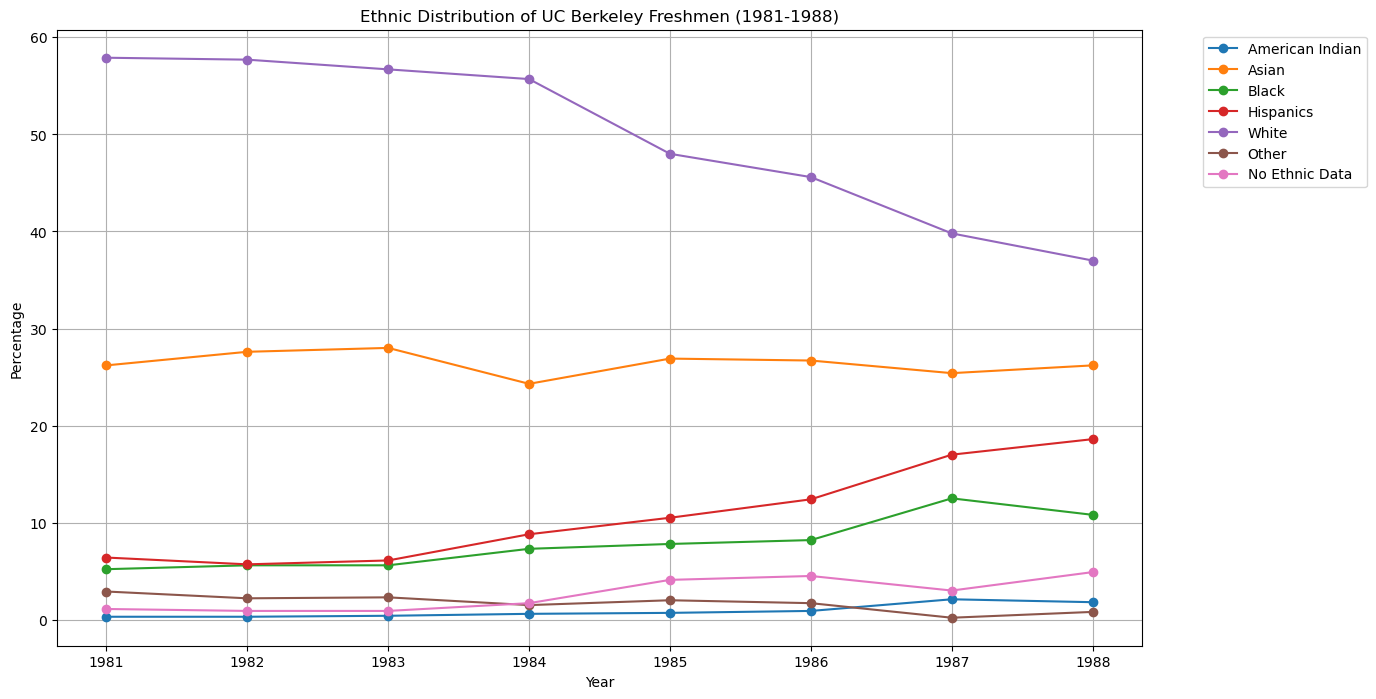

In [10]:
# Instructor Solution 2

plt.figure(figsize=(14, 8))
for column in major_ethnic_groups.columns[1:-1]:  # Exclude 'Year' and 'Total'
    plt.plot(major_ethnic_groups['Year'], major_ethnic_groups[column], marker='o', label=column)

plt.title('Ethnic Distribution of UC Berkeley Freshmen (1981-1988)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

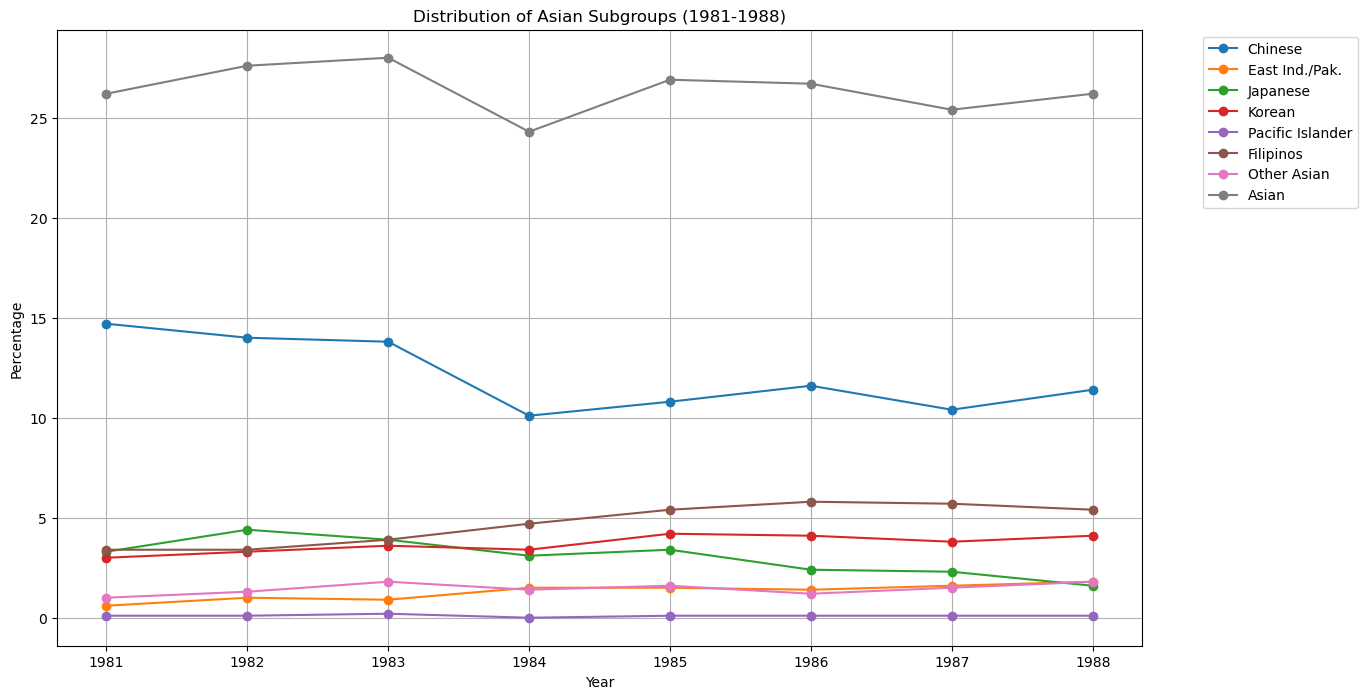

In [11]:
# Instructor Solution 3

asian_distribution = all_ethnic_groups[['Year', 'Chinese', 'East Ind./Pak.', 'Japanese', 'Korean', 'Pacific Islander', 'Filipinos', 'Other Asian', 'Asian']]

plt.figure(figsize=(14, 8))
for column in asian_distribution.columns[1:]:
    plt.plot(asian_distribution['Year'], asian_distribution[column], marker='o', label=column)

plt.title('Distribution of Asian Subgroups (1981-1988)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Question 2.2:** Describe what dataframe/plot(s) you have produced. What inclined you to produce it? What has it allowed you to visualize or notice?

*Your Answer Here*

**Question 2.3:** Having explored the data yourself, are there any valid conclusions that can be drawn about the ethnic distribution of UC Berkeley's freshmen in the 1980s? If there are no valid conclusions to be made, what are the reasons for this limitation?

*Your Answer Here*

Instructor Solution:

No conclusions can be drawn as we do not have sufficient data to compare against. If we were to receive additional data, we could compare Berkeley's freshman demographics to California's demographics. If we find a discrepancy, there are many things that can attribute to such a finding. One, the applicant pool could be representative of the state demographics, but our admissions process is biased. Two, the admissions process could be biased in a non-intentional way because applicants that are representative may not apply to majors in a representatitive way. Three, the admissions process has intentional racism. Four, the applicant pool is not representatitve of the state's pool. Perhaps some demographics do not want to go to college, but there still may or may not be racial bias in the admissions process.

**Question 2.4:** Say you are a statistician for UC Berkeley, and your job is to validate the ethnic distributions of each incoming class so you can report back to the admissions office. What additional data is necessary for check if UC Berkeley's admission rates have any signficant discrepancies?

*Your Answer Here*

Instructor Solution:

We will need the state's demographics, the applicant pool demographics, and applicant pool dmeographics per major.

**Question 2.5:** Say you were a government official specializing in education intervention. Where do you believe intervention should take place to ensure that college admission numbers are more equally distributed? Intervention at college admissions? Or at an earlier stage?

*Your Answer Here*

## **Question 3: Closing Thoughts**

What we just observed is a classic example of [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox), a statistical phenomenon where a trend that appears in different groups of data disappears or reverses when these groups are combined. In our case, the groups are the different majors. This paradox is part of a broader set of considerations that need to be made when performing EDA, as it can drastically change the interpretation of the data and subsequent policy recommendation.

In the following questions, we'll delve further into how incomplete EDA and phenomena like Simpson's Paradox may pose as an invisible obstacle to comprehensive analysis.

**Question 3.1:** In part 1, when we looked at all UC Berkeley applicants, we found gender bias in the admission process. Suppose a policy was recommended and implemented to equalise the university-wide acceptance rates between male and female. What positive consequences would you anticipate from this policy? What negative consequences would you anticipate from this policy?

*Your Answer Here*

**Question 3.2:** In part 2, when we looked at applicants to individual majors, we did not find gender bias in the admission process. Suppose nothing was changed about UC Berkeley's admission process as a result. What positive and negative consequences would you anticipate from this inaction?

*Your Answer Here*

**Question 3.3:** Of the two methods of analysis (i.e. looking at individual majors or not), which one do you think is "more correct"?

*Your Answer Here*

There is actually no correct answer to the question above. There are countless ways in which we could've "chopped up" the data into groups. For example, we could've grouped the applicants, not by major, but by the first letter of their surname. Should we make policy recommendations if we found a bias against male applicants with D names?

At the end, Simpson's Paradox tells us that the choice of data grouping involves a values judgment—we may deem separation by majors as more important than separation by first letter of their surname. To make a decision, we must consider the impact of this choice, as in questions 3.1 and 3.2. As diligent data analysts, we must be aware of this often implicit values decision when we dive into a dataset.

**Question 3.4:** (Self-reflection) When you reached the end of part 1, was the conclusion of gender bias what you expected of UC Berkeley in 1973? How did that make you feel? Did this feeling motivate you to dive deeper into the dataset, or to quickly announce it to the world?

*Your Answer Here*

<br/>

<hr style="border: 1px solid #fdb515;" />

This is the end of the notebook! Great work!

          /\\_/\\      
         / o o  \\     
        (   "    ))    
         \\~(*)~//     
          \\~~~//      